# Click-Through Rate Prediction (CTR) using Machine Learning Methods

## What is Click-Through Rate (CTR)?

**Click-Through Rate (CTR)** is a key metric in online advertising.  

$$
CTR = \frac{\text{Clicks}}{\text{Impressions}} \times 100\%
$$

- **Clicks** -> how many times users clicked on the ad  
- **Impressions** -> how many times the ad was shown  

The **CTR prediction task** focuses on modeling the *likelihood of a click* based on:
- Ad characteristics (e.g., text, image, placement)  
- User profile data (e.g., demographics, behavior)  
- Contextual features (e.g., time of day, device, location)  

## Data Analysis 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Dictionary

- **Daily Time Spent on Site (float):** The amount of time (in minutes) a user spends on the website/application per day.
- **Age (float):** Age of the user in years. 
- **Area Income (float):** The average income of the geographical area (neighborhood or region) where the user resides.   
- **Daily Internet Usage (float):** The amount of time (in minutes) a user spends on the internet daily.  
- **Ad Topic Line (string):** The headline or subject line of the advertisement shown to the user. 
- **City (string):** The city where the user resides.
- **Gender (string):** Gender indicator. Will be mapped to `1` = `Male` `0` = `Female`.
- **Country (string):** The country where the user resides. 
- **Timestamp (Datetime):** The date and time when the ad interaction data was recorded.  
- **Clicked on Ad (int: 0 or 1) :** (TARGET COLUMN)  Target variable indicating whether the user clicked on the ad. `1` = clicked, `0` = not clicked.  

In [2]:
data = pd.read_csv("data/ad_10000records.csv")
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Female,Cameroon,2016-05-15 13:18:34,0
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Male,Turkey,2016-04-03 21:13:46,1
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,Male,French Guiana,2016-03-11 06:49:10,0
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Male,Vanuatu,2016-03-24 06:36:52,0
9,51.65,51.0,74535.94,188.56,Function-based incremental standardization,Edwardmouth,Female,Cameroon,2016-01-31 05:12:44,0


In [3]:
print(
    f"Data has shape: {data.shape} which has {data.shape[0]} columns and {data.shape[1]} features."
)

Data has shape: (10000, 10) which has 10000 columns and 10 features.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


### Daily Time Spent (in minutes)

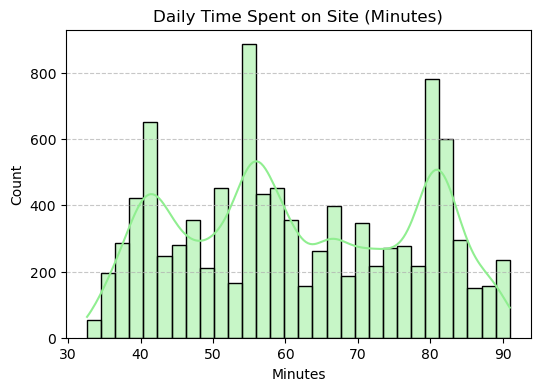

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(
    data["Daily Time Spent on Site"].dropna(),
    bins=30,
    kde=True,
    color="lightgreen",
    edgecolor="black",
)

plt.title("Daily Time Spent on Site (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Age

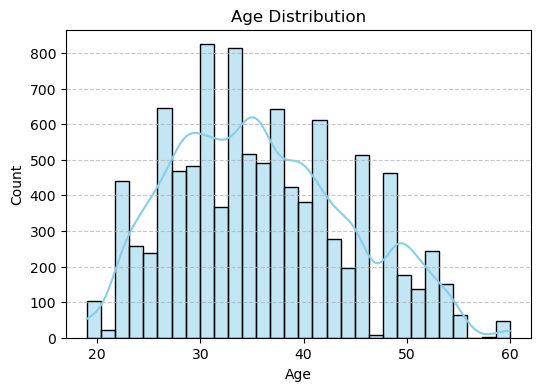

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(
    data["Age"].dropna(), bins=30, kde=True, color="skyblue", edgecolor="black"
)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Gender

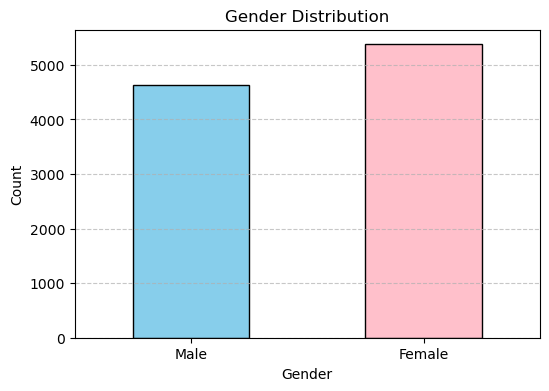

In [7]:
plt.figure(figsize=(6, 4))

data["Gender"].value_counts().reindex(["Male", "Female"]).plot(
    kind="bar", color=["skyblue", "pink"], edgecolor="black"
)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Clicked on Ad

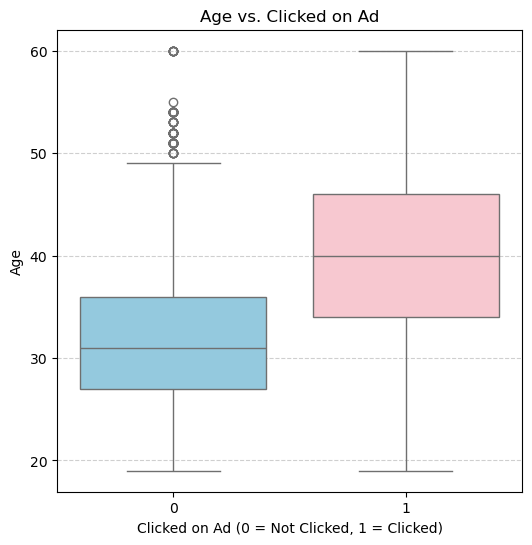

In [8]:
plt.figure(figsize=(6, 6))

sns.boxplot(
    x="Clicked on Ad",
    y="Age",
    data=data,
    hue="Clicked on Ad",
    legend=False,
    palette=["skyblue", "pink"],
)

plt.title("Age vs. Clicked on Ad")
plt.xlabel("Clicked on Ad (0 = Not Clicked, 1 = Clicked)")
plt.ylabel("Age")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

### Click-Through Rate (CTR)

In [9]:
# Click through rate
clicked = data["Clicked on Ad"].value_counts()[1]
not_clicked = data["Clicked on Ad"].value_counts()[0]

click_through_rate = (clicked / (clicked + not_clicked)) * 100

print(f"There are {clicked} people who have clicked on the ad.")
print(f"There are {not_clicked} people who have not click on the ad.")
print(f"The click through rate is: {click_through_rate:.2f}%")

There are 4917 people who have clicked on the ad.
There are 5083 people who have not click on the ad.
The click through rate is: 49.17%


#### CTR by Gender

In [10]:
ctr_by_gender = (
    data.groupby("Gender")["Clicked on Ad"].mean().reindex(["Male", "Female"])
)
ctr_male = ctr_by_gender["Male"] * 100
ctr_female = ctr_by_gender["Female"] * 100

print(f"{ctr_male:.2f}% of male users clicked on ad.")
print(f"{ctr_female:.2f}% of female users clicked on ad.")

46.50% of male users clicked on ad.
51.47% of female users clicked on ad.


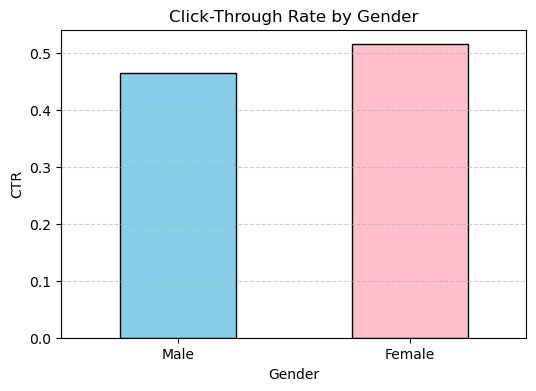

In [11]:
plt.figure(figsize=(6, 4))

ctr_by_gender.plot(kind="bar", color=["skyblue", "pink"], edgecolor="black")

plt.title("Click-Through Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("CTR")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

#### CTR by Country

In [12]:
ctr_by_country = data.groupby("Country")["Clicked on Ad"].mean()

turkey_ctr = ctr_by_country.get("Turkey", None)
china_ctr = ctr_by_country.get("China", None)

print(f"CTR for Turkey: {turkey_ctr:.2%}")
print(f"CTR for China: {china_ctr:.2%}")

CTR for Turkey: 91.67%
CTR for China: 80.65%


In [13]:
# Top countries by CTR
top_ctr_by_country = (
    data.groupby("Country")["Clicked on Ad"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_ctr_by_country

Country
Antigua and Barbuda         1.0
Azerbaijan                  1.0
Central African Republic    1.0
Guinea-Bissau               1.0
Gambia                      1.0
Cayman Islands              1.0
Norfolk Island              1.0
Martinique                  1.0
Monaco                      1.0
Montserrat                  1.0
Name: Clicked on Ad, dtype: float64

In [14]:
# Bottom countries by CTR
bottom_ctr_by_country = (
    data.groupby("Country")["Clicked on Ad"]
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

bottom_ctr_by_country

Country
Angola        0.0
Argentina     0.0
Cyprus        0.0
Italy         0.0
Guam          0.0
Mozambique    0.0
Nepal         0.0
Mauritania    0.0
Malaysia      0.0
Mali          0.0
Name: Clicked on Ad, dtype: float64

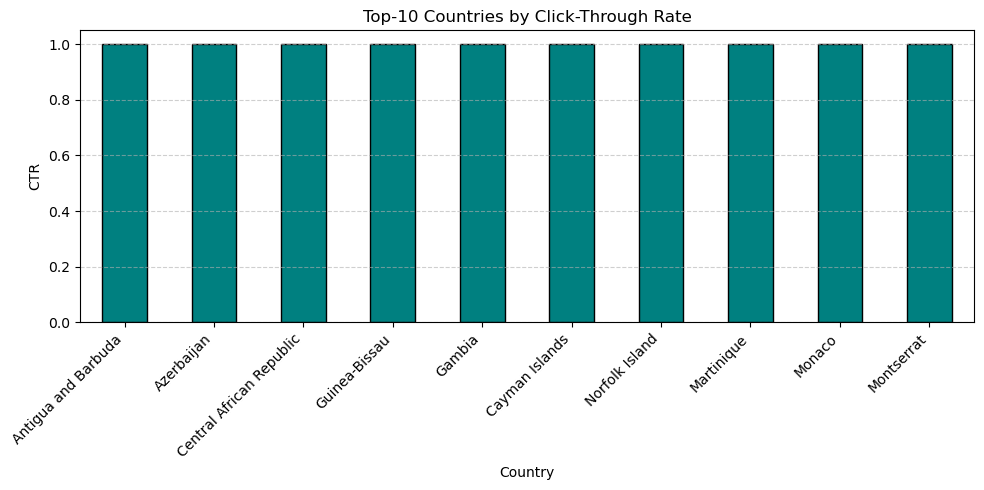

In [15]:
plt.figure(figsize=(10, 5))

top_ctr_by_country.plot(kind="bar", color="teal", edgecolor="black")

plt.title("Top-10 Countries by Click-Through Rate")
plt.xlabel("Country")
plt.ylabel("CTR")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

#### CTR by Time

In [16]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Hour"] = data["Timestamp"].dt.hour

ctr_by_hour = data.groupby("Hour")["Clicked on Ad"].mean()
ctr_by_hour

Hour
0     0.256579
1     0.491848
2     0.480938
3     0.271277
4     0.325103
5     0.298643
6     0.404110
7     0.446602
8     0.612245
9     0.653543
10    0.408163
11    0.549213
12    0.710692
13    0.317308
14    0.607744
15    0.503546
16    0.541315
17    0.569892
18    0.579151
19    0.461538
20    0.532199
21    0.633941
22    0.412174
23    0.664835
Name: Clicked on Ad, dtype: float64

In [17]:
max_hour = ctr_by_hour.idxmax()
max_ctr = ctr_by_hour.max()

min_hour = ctr_by_hour.idxmin()
min_ctr = ctr_by_hour.min()

print(f"Highest CTR: {max_ctr:.2%} at hour {max_hour}:00")
print(f"Lowest CTR: {min_ctr:.2%} at hour {min_hour}:00")

Highest CTR: 71.07% at hour 12:00
Lowest CTR: 25.66% at hour 0:00


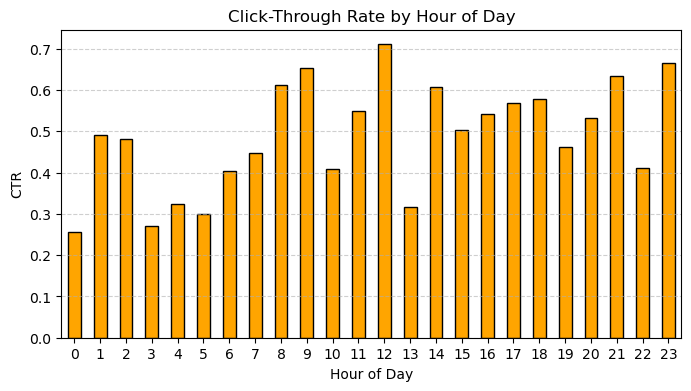

In [18]:
plt.figure(figsize=(8, 4))

ctr_by_hour.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Click-Through Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("CTR")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [19]:
data["Day"] = data["Timestamp"].dt.dayofweek

ctr_by_day = data.groupby("Day")["Clicked on Ad"].mean()
ctr_day_labels = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

max_id = ctr_by_day.idxmax()
max_ctr = ctr_by_day.max()

min_id = ctr_by_day.idxmin()
min_ctr = ctr_by_day.min()

print(f"Highest CTR: {max_ctr:.2%} at day {ctr_day_labels[max_id]}.")
print(f"Lowest CTR: {min_ctr:.2%} at day {ctr_day_labels[min_id]}.")

Highest CTR: 59.16% at day Wednesday.
Lowest CTR: 38.36% at day Friday.


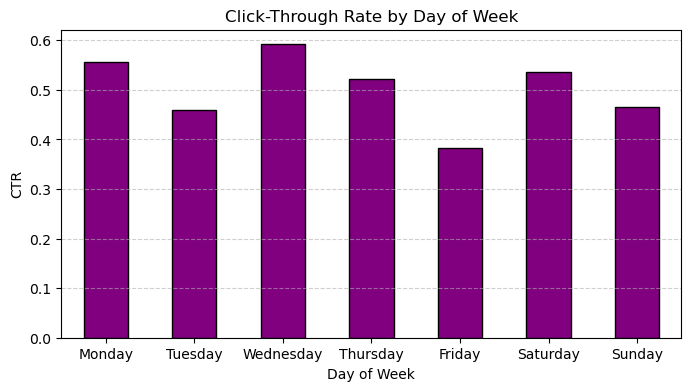

In [20]:
plt.figure(figsize=(8, 4))

ctr_by_day.reindex(range(7)).plot(kind="bar", color="purple", edgecolor="black")

plt.title("Click-Through Rate by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("CTR")
plt.xticks(ticks=range(7), labels=ctr_day_labels, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

## Machine Learning Pipeline

In [21]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier as xgb

### Data Preprocessing

In [22]:
data = pd.read_csv("data/ad_10000records.csv")

# Map categorical variable Gender to int
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])

x = data.iloc[:, 0:7] # First seven features as input
x = x.drop(["Ad Topic Line", "City"], axis=1)  # Drop categorical
y = data.iloc[:, 9] # Target column Clicked on Ad

In [23]:
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,1,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,1,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,0,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,0,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,0,Qatar,2016-07-21 10:54:35,1
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,0,Cameroon,2016-05-15 13:18:34,0
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,1,Turkey,2016-04-03 21:13:46,1
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,1,French Guiana,2016-03-11 06:49:10,0
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,1,Vanuatu,2016-03-24 06:36:52,0
9,51.65,51.0,74535.94,188.56,Function-based incremental standardization,Edwardmouth,0,Cameroon,2016-01-31 05:12:44,0


### Train-Test Split

In [24]:
# # Using train test split to split the dataset
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=1773
# )

# print(f"x_train has shape {x_train.shape}")
# print(f"y_train has shape {y_train.shape}")
# print(f"x_test has shape {x_test.shape}")
# print(f"y_test has shape {y_test.shape}")

# # Different models (not fine tuned)
# log_reg = LogisticRegression(max_iter=2000, class_weight="balanced")
# # model = xgb(random_state=1773) # XGBoostClassifier model

# # Training the model
# log_reg.fit(x_train, y_train)

In [25]:
# # Predicting test dataset values with the model
# y_pred = log_reg.predict(x_test)

# # Accuracy check of the model prediction
# print(f"The model accuracy is {accuracy_score(y_test,y_pred)}", )

### Model Evaluation (Repeated Stratified Cross Validation)

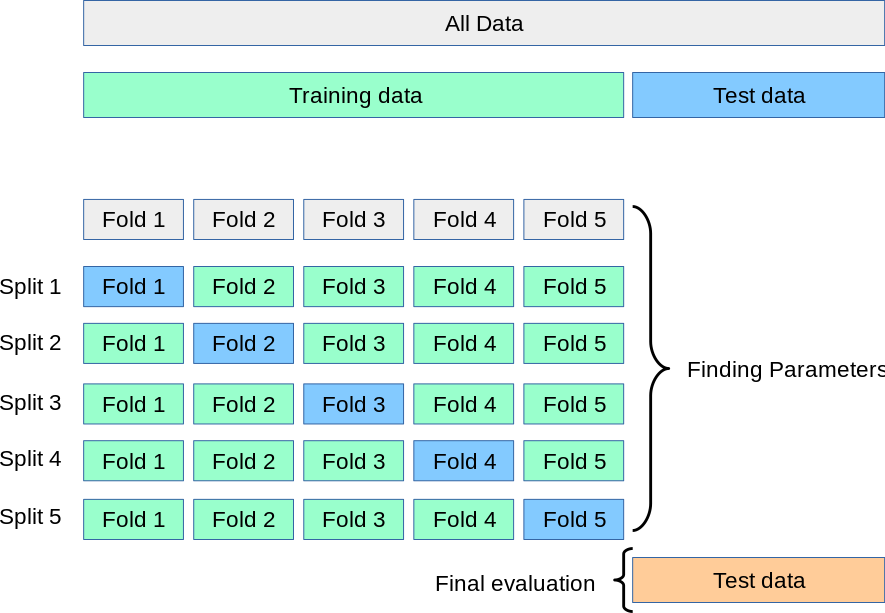

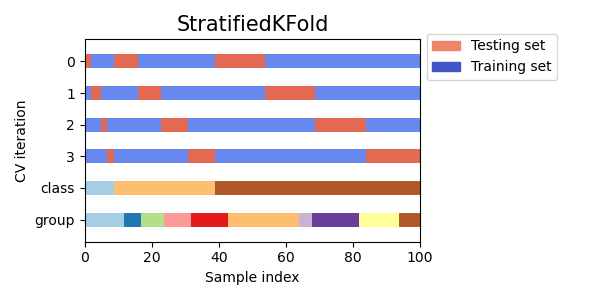

In [26]:
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1773) # 10-fold cross validation
cv = RepeatedStratifiedKFold(
    n_splits=10, n_repeats=10, random_state=1773
)  # 10 times 10-fold cross validation

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000, class_weight="balanced", n_jobs=-1
    ),
    "KNeighbors": KNeighborsClassifier(
        n_neighbors=5, weights="uniform", metric="minkowski", p=2, n_jobs=-1
    ),
    "DecisionTree": DecisionTreeClassifier(criterion="gini"),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=1773,
    ),
    "XGBoost": xgb(random_state=1773),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate="constant",
        learning_rate_init=1e-3,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=1773,
    ),
}

scorer = {
    "accuracy": "accuracy",
    "f1": "f1",
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",
    "logloss": "neg_log_loss",
}

results = []
for name, estimator in models.items():
    scores = cross_validate(
        estimator,
        X=x,
        y=y,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,  # -1 for using all cores
        return_train_score=False,
        error_score="raise",  # Debug purposes
    )

    results.append(
        {
            "Model": name,
            "Accuracy": np.mean(scores["test_accuracy"]),
            "F1": np.mean(scores["test_f1"]),
            "ROC_AUC": np.mean(scores["test_roc_auc"]),
            "PR_AUC": np.mean(scores["test_pr_auc"]),
            "LogLoss": -np.mean(scores["test_logloss"]),
        }
    )

leaderboard = (
    pd.DataFrame(results)
    .sort_values(by="Accuracy", ascending=False)
    .reset_index(drop=True)
)

# print("Target:", target)
# print("Pos rate:", y.mean().round(4))
print(leaderboard)

                Model  Accuracy        F1   ROC_AUC    PR_AUC    LogLoss
0             XGBoost   0.79955  0.792364  0.880642  0.882815   0.437639
1        RandomForest   0.77942  0.773666  0.860035  0.856090   0.544066
2          KNeighbors   0.76188  0.756675  0.828331  0.787988   2.174643
3        DecisionTree   0.74066  0.732341  0.748405  0.687297   8.173428
4  LogisticRegression   0.71947  0.709928  0.775172  0.774169   0.569389
5                 MLP   0.52047  0.101915  0.561823  0.533323  13.182109


## References

[1] https://www.geeksforgeeks.org/machine-learning/click-through-rate-prediction/

[2] https://matplotlib.org/stable/users/index.html

[3] https://seaborn.pydata.org/api.html

[4] https://scikit-learn.org/stable/modules/cross_validation.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

[6] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

[7] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

[9] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

[10] https://xgboost.readthedocs.io/en/stable/